In [3]:

# We'll be using Sklearn library for this task..
from sklearn.linear_model import LinearRegression 
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf

/home/henrytsui/anaconda3/envs/IDS/lib/python3.8/site-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



[*********************100%***********************]  1 of 1 completed


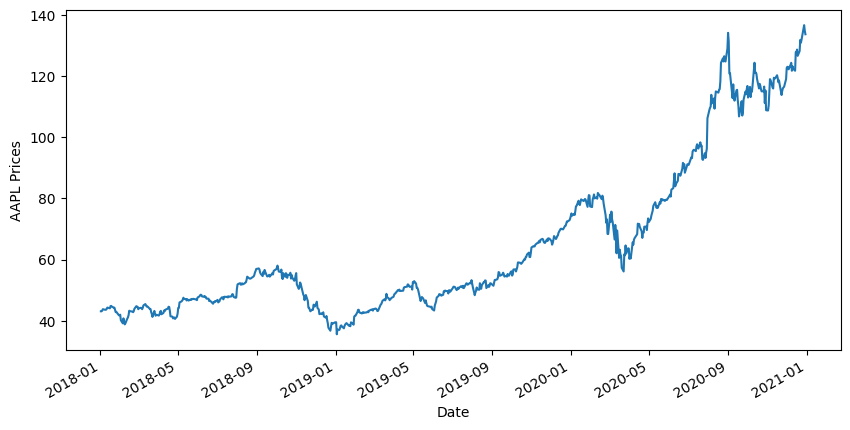

In [12]:
Df = yf.download('AAPL','2018-01-01','2020-12-31')
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("AAPL Prices")
plt.show()

In [13]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2018-01-16,43.888332,43.551666
2018-01-17,44.046666,43.660833
2018-01-18,44.365000,43.851667
2018-01-19,44.545834,44.024722
2018-01-22,44.735001,44.120834


In [14]:
y = Df['Close']
y.head()

Date
2018-01-16    44.047501
2018-01-17    44.775002
2018-01-18    44.814999
2018-01-19    44.615002
2018-01-22    44.250000
Name: Close, dtype: float64

In [15]:
t=.8 
t = int(t*len(Df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [16]:
linear = LinearRegression().fit(X_train,y_train)
plt.style.use('dark_background')


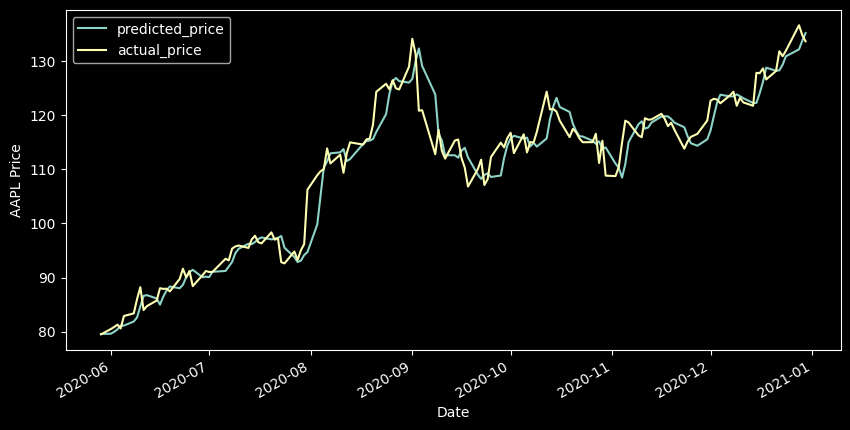

In [52]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
pp = pd.DataFrame(X_test,index=y_test.index)  
plt.plot(predicted_price)
# plt.plot(y_test)
# predicted_price.plot(figsize=(10,5))  
# pp.plot()  
y_test.plot(figsize=(10,5)) 
# plt.plot(pp)
# 
plt.legend(['predicted_price','actual_price','min_price', "max_price"])  
plt.ylabel("AAPL Price")  
plt.savefig(f"../src/else/linear1.png", transparent = True)


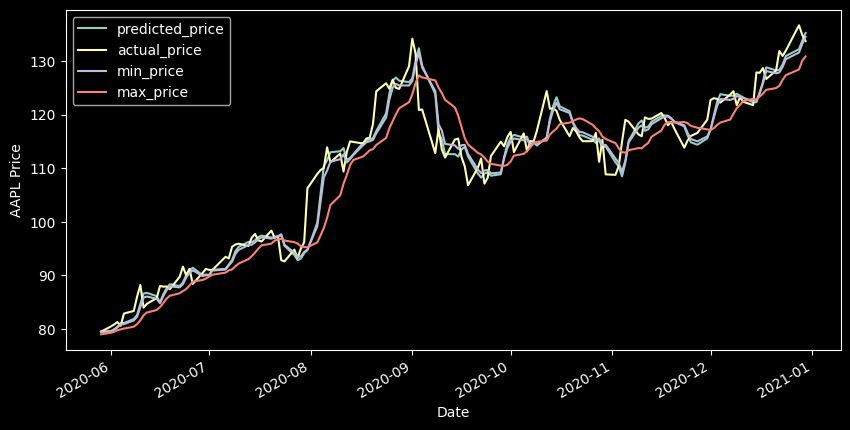

In [53]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
pp = pd.DataFrame(X_test,index=y_test.index)  
plt.plot(predicted_price)
# plt.plot(y_test)
# predicted_price.plot(figsize=(10,5))  
# pp.plot()  
y_test.plot(figsize=(10,5)) 
plt.plot(pp)
# 
plt.legend(['predicted_price','actual_price','min_price', "max_price"])  
plt.ylabel("AAPL Price")  
plt.savefig(f"../src/else/linear2.png", transparent = True)
